**Machine Learning(IE406)**




Lukhi Krunalkumar (201901449)




In [ ]:
from sympy import *
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy.linalg as npla


**Normalization**

In [ ]:
def Normalization(dt):
  
  for i in range(1,dt.shape[1]):
    std=dt[:,i].std()
    mean=dt[:,i].mean()
    dt[:,i]=(dt[:,i]-mean)/std

  return dt

**Cost Function**

In [ ]:
def Cost(X, y, wt,lamda):
  s = 0;
  m=y.size
  s=s+ np.matmul(y - X.dot(wt), y - X.dot(wt))
  wt = np.absolute(wt)
  Answer=(s + (lamda * sum(wt))) / m
  return s

**Gradient Descent**

In [ ]:
def Gradient_Descent(X, y, wt, lr, max_itr):
  m = y.size;
  n = float(X.shape[0])
  
  for _ in range(max_itr):
    wt = wt + 2 * (lr/n) * (X.T.dot(y -(X.dot(wt))) )
  
  return wt

**Lasso Regression**

In [ ]:
def Lasso_Regression(wt, X, y, max_itr, lam, cost_arr):
  wt_1=np.zeros(len(wt))
  
  for i in range(0,len(wt)):
    wt_1[i]=wt[i]

  for i in range(100):
    Z = Gradient_Descent(X,y,wt,max_itr,1000)
    F = float((lam*itr)/2)
    
    for j in range(0,len(wt)):
      wt_1[j] = wt[j]
    
    for j in range(0,len(wt)):
      if(Z[j]<False and Z[j]>-1*F):
        wt_1[j]=0
      elif(Z[j]>F):
        wt_1[j] = Z[j] - F
      else:
        wt_1[j] = Z[j] + F

    S=0.00
    for j in range(0,len(wt)-1):
       S = S + float(abs( wt_1[j] - float(wt[j]) ))

    if(S<1e-5):
      return wt_1

    for j in range(0,len(wt)):
      wt[j] = wt_1[j]

    cost_arr.append(Cost(X, y, wt, lam));
  return wt_1;

**Prediction**

In [ ]:
def predict(X, wt):
  return X.dot(wt)

**Import from csv file**

Theta Values: 
[ 0.016016    0.12132296  0.13383029  0.06606024 -0.03990396  0.1367954
  0.48264942  0.09122663]


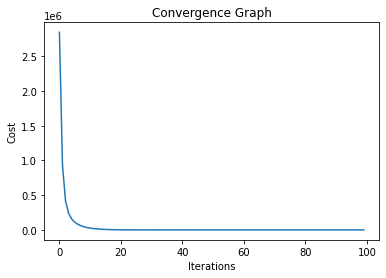

In [ ]:
DF = pd.read_csv('Admission_Predict.csv');
dt = Normalization(DF.to_numpy())
y = dt[:, 8]
lamda=0.001
wt=[150.00,100.00,50.00,100.00,150.00,200.00,200.00,50.00]
itr=0.0004
cost_arr=[]

X=np.stack((np.ones(dt.shape[0]),dt[:, 1],dt[:,2],dt[:,3],dt[:,4],dt[:,5],dt[:, 6],dt[:,7]),axis=-1)
X_trained, X_test, Y_trained, Y_test = train_test_split(X,y,test_size=0.2, random_state=1)

wt=Lasso_Regression(wt,X_trained,Y_trained,itr,lamda,cost_arr)

print("Theta Values: ")
print(wt)

y_prdct = predict(X_test,wt)
figure=plt.figure()
ax=figure.add_subplot()
ax.plot(range(len(cost_arr)),cost_arr,)
ax.set_title("Convergence Graph")
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.show()

**Inbuilt Lasso Regression Function**

In [ ]:
DF=pd.read_csv('Admission_Predict.csv');
dt = Normalization(DF.to_numpy())
y = dt[:, 8]
lamda=0.001

X = np.stack((dt[:, 1],dt[:,2],dt[:,3],dt[:,4],dt[:,5],dt[:, 6],dt[:,7]),axis=-1)
X_trained, X_test, Y_trained, Y_test = train_test_split(X, y, test_size=0.2, random_state=1)

reg = linear_model.Lasso(alpha=lamda);
reg.fit(X_trained,Y_trained)
print("Theta values: ")
print([reg.intercept_],reg.coef_)


Y_prdct = reg.predict(X_test)

Theta values: 
[0.01599612954614453] [ 0.12214211  0.13258788  0.06362378 -0.03374715  0.13431583  0.48154424
  0.09031626]


We can see that theta values of my lasso regression implemetation and inbuilt function of lasso regressions are very close.